<a href="https://colab.research.google.com/github/Abinavabii/Abinavabii/blob/main/Blinkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 **Blinkit Sales Analysis Dashboard**

This project analyzes Blinkit's sales performance using Python.
The goal is to explore sales trends, product performance, and outlet insights
through data visualization and KPI metrics.

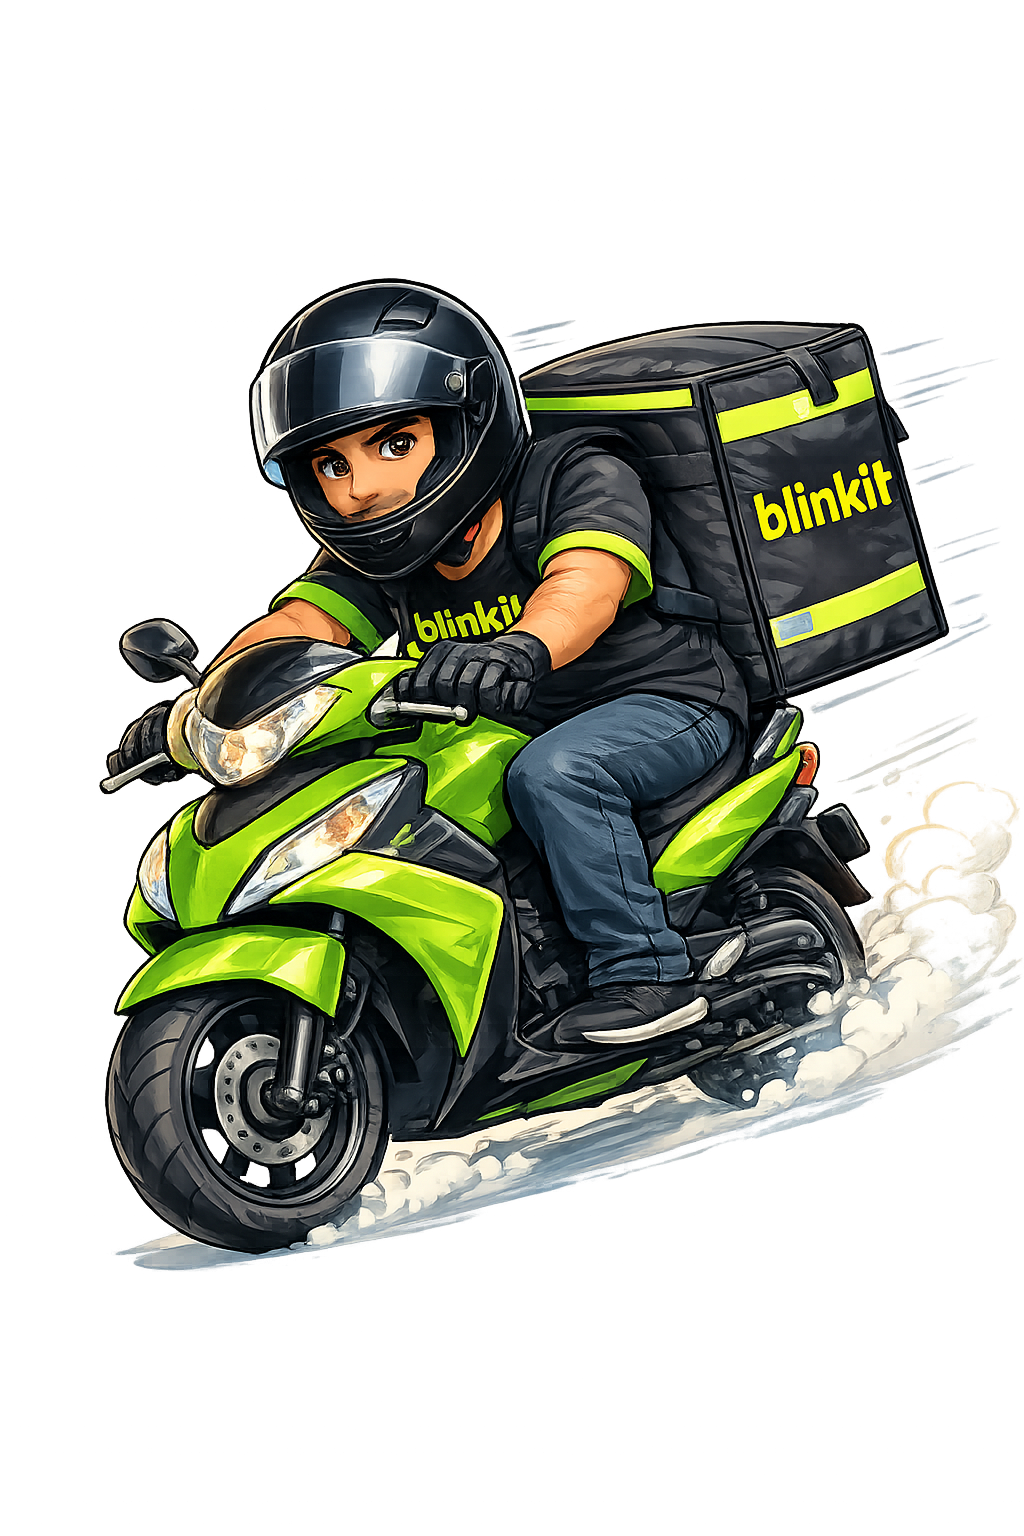

## 📌 Business Objective

The objective of this analysis is to:

- Understand overall sales performance
- Compare sales by fat content
- Analyze item category performance
- Evaluate outlet establishment trends
- Identify high-performing segments

In [ ]:
import pandas as pd

## 📂 Dataset Description

The dataset contains information about:

- Item Identifier
- Item Type
- Item Fat Content
- Item Weight
- Outlet Establishment Year
- Item Outlet Sales
- Rating

In [ ]:
df = pd.read_csv("BlinkIt.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 🧹 Data Cleaning

- Standardized fat content values (Low Fat, Regular)
- Filled missing Item Weight values
- Verified no null values remain

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [ ]:
df['Item Weight'] = df['Item Weight'].fillna(0)

In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


## 📊 Key Performance Indicators (KPIs)

We calculate the following KPIs:

- Total Sales
- Average Sales
- Total Number of Items
- Average Rating

These metrics provide a high-level overview of business performance.

In [ ]:
total_sales = df['Sales'].sum()
average_sales = df['Sales'].mean()
number_of_items = df['Item Identifier'].count()
average_rating = df['Rating'].mean()  # If rating column exists

print("Total Sales:", total_sales)
print("Average Sales:", average_sales)
print("Number of Items:", number_of_items)
print("Average Rating:", average_rating)

Total Sales: 1201681.4928
Average Sales: 140.99278338613163
Number of Items: 8523
Average Rating: 3.965857092573038


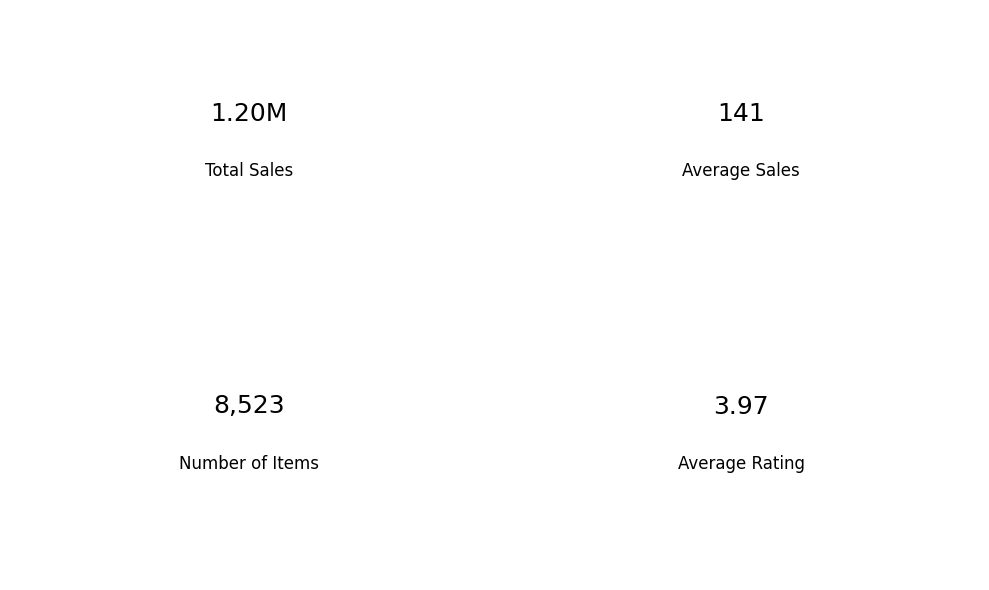

In [ ]:
import matplotlib.pyplot as plt

# KPI calculations
total_sales = df['Sales'].sum()
average_sales = df['Sales'].mean()
number_of_items = df['Item Identifier'].count()
average_rating = df['Rating'].mean()

# Create 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Remove axes
for ax in axs.flat:
    ax.axis('off')

# KPI 1 - Total Sales
axs[0, 0].text(0.5, 0.6, f"{total_sales/1_000_000:.2f}M",
               fontsize=18, ha='center')
axs[0, 0].text(0.5, 0.4, "Total Sales",
               fontsize=12, ha='center')

# KPI 2 - Average Sales
axs[0, 1].text(0.5, 0.6, f"{average_sales:,.0f}",
               fontsize=18, ha='center')
axs[0, 1].text(0.5, 0.4, "Average Sales",
               fontsize=12, ha='center')

# KPI 3 - Number of Items
axs[1, 0].text(0.5, 0.6, f"{number_of_items:,}",
               fontsize=18, ha='center')
axs[1, 0].text(0.5, 0.4, "Number of Items",
               fontsize=12, ha='center')

# KPI 4 - Average Rating
axs[1, 1].text(0.5, 0.6, f"{average_rating:.2f}",
               fontsize=18, ha='center')
axs[1, 1].text(0.5, 0.4, "Average Rating",
               fontsize=12, ha='center')

plt.tight_layout()
plt.show()

### 🔎 Insights

- The business generated **1.20 million** in total sales.
- The average sales per item is **141**.
- The product catalog contains **8523**.
- The average customer rating is **3.97**, indicating customer satisfaction level.

In [ ]:
import matplotlib.pyplot as plt

### 🥧 Sales by Fat Content

This chart shows the distribution of total sales based on item fat content.

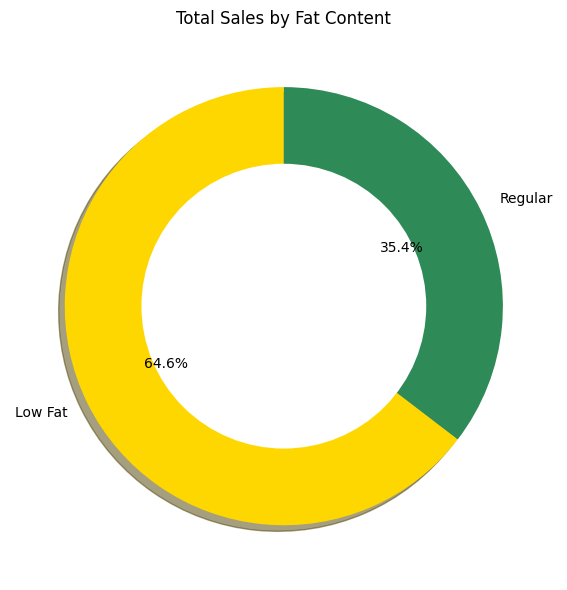

In [ ]:

df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

fat_sales = df.groupby('Item Fat Content')['Sales'].sum()

plt.figure(figsize=(6,6))

colors = ['#FFD700', '#2E8B57']

wedges, texts, autotexts = plt.pie(
    fat_sales,
    labels=fat_sales.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    shadow=True
)


centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Total Sales by Fat Content")
plt.tight_layout()
plt.show()

### 🔎 Insight

- Low Fat products contribute the majority of sales.
- Regular products account for a smaller portion.
- This suggests customers prefer healthier options.

### 📊 Sales by Item Type

This chart highlights the top-performing product categories.

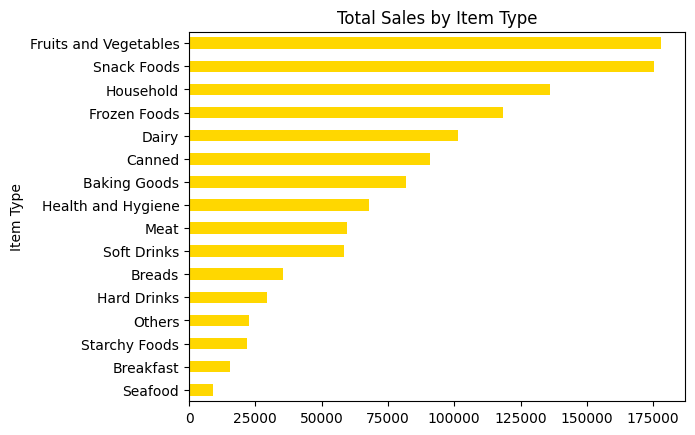

In [ ]:
item_sales = df.groupby('Item Type')['Sales'].sum().sort_values()

item_sales.plot(kind='barh',color='#FFD700')
plt.title("Total Sales by Item Type")
plt.show()

### 🔎 Insight

- Snacks and household items are top revenue drivers.
- Some categories generate significantly lower sales.
- The business can focus marketing efforts on high-performing categories.

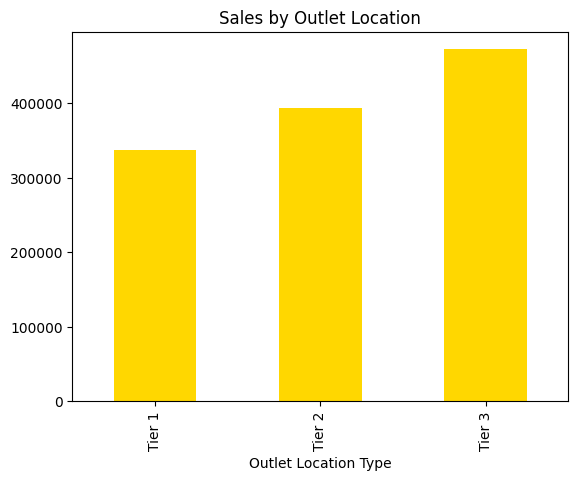

In [ ]:
location_sales = df.groupby('Outlet Location Type')['Sales'].sum()

location_sales.plot(kind='bar',color='#FFD700')
plt.title("Sales by Outlet Location")
plt.show()

### 📈 Sales Trend by Outlet Establishment Year

This chart analyzes how sales vary based on outlet age.

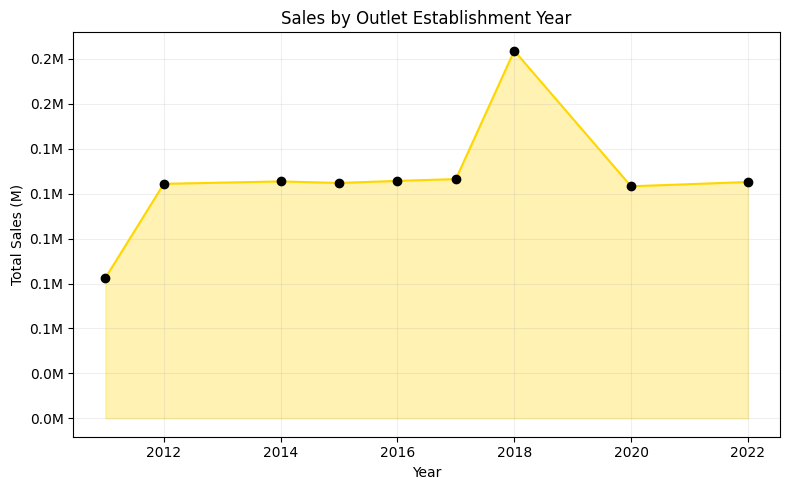

In [ ]:

from matplotlib.ticker import FuncFormatter

est_sales = df.groupby('Outlet Establishment Year')['Sales'].sum()

plt.figure(figsize=(8,5))

# Plot line
plt.plot(
    est_sales.index,
    est_sales.values,
    color='#FFD700',        # Yellow line
    marker='o',
    markerfacecolor='black',  # Black marker fill
    markeredgecolor='black'
)

# Fill area under line
plt.fill_between(
    est_sales.index,
    est_sales.values,
    color='#FFD700',
    alpha=0.3   # Transparency
)

plt.title("Sales by Outlet Establishment Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (M)")

# Optional: Show values in Millions
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{x/1_000_000:.1f}M')
)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

### 🔎 Insight

- Older outlets generate higher sales.
- Newly established outlets show growth potential.
- This suggests outlet maturity impacts revenue.

## 🏁 Conclusion

From this analysis:

- Low Fat items dominate sales.
- Certain product categories significantly outperform others.
- Outlet establishment year influences revenue.
- Overall sales performance is strong with stable growth trends.

This dashboard provides valuable insights for business decision-making.

## 🛠 Technologies Used

- Python
- Pandas
- Matplotlib
- Jupyter Notebook